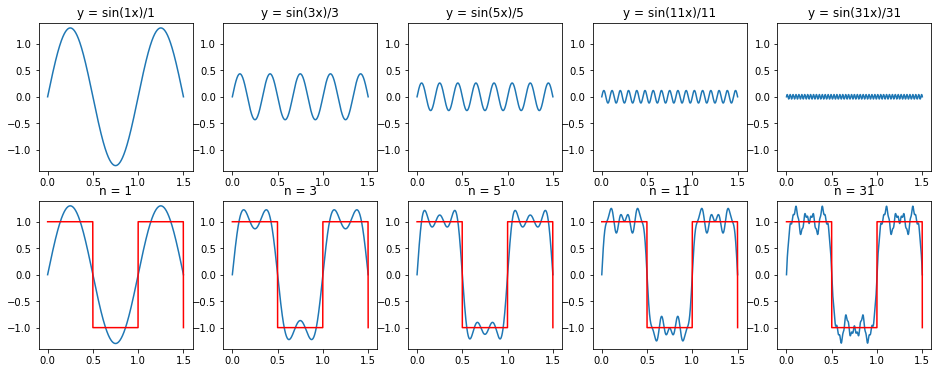

In [1]:
#dia 3: square wave

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 2.0*np.pi*1.5, 1000)

y1 = 1.3*np.sin(x)
y2 = 1.3*np.sin(3.0*x)/3.0
y3 = 1.3*np.sin(5.0*x)/5.0
y4 = 1.3*np.sin(11.0*x)/11.0
y5 = 1.3*np.sin(31.0*x)/31.0

square = signal.square(x)

fig, axs = plt.subplots(2, 5, figsize=(16,6))

t = np.linspace(0.0, 1.5, 1000)

axs[0,0].plot(t,y1)
axs[0,0].set_title("y = sin(1x)/1")
axs[0,1].plot(t,y2)
axs[0,1].set_title("y = sin(3x)/3")
axs[0,2].plot(t,y3)
axs[0,2].set_title("y = sin(5x)/5")
axs[0,3].plot(t,y4)
axs[0,3].set_title("y = sin(11x)/11")
axs[0,4].plot(t,y5)
axs[0,4].set_title("y = sin(31x)/31")

axs[1,0].plot(t,y1)
axs[1,0].plot(t,square, color='r')
axs[1,0].set_title("n = 1")

axs[1,1].plot(t,y1+y2)
axs[1,1].plot(t,square, color='r')
axs[1,1].set_title("n = 3")

axs[1,2].plot(t,y1+y2+y3)
axs[1,2].plot(t,square, color='r')
axs[1,2].set_title("n = 5")

axs[1,3].plot(t,y1+y2+y3+y4)
axs[1,3].plot(t,square, color='r')
axs[1,3].set_title("n = 11")

axs[1,4].plot(t,y1+y2+y3+y4+y5)
axs[1,4].plot(t,square, color='r')
axs[1,4].set_title("n = 31")

for ax in axs.flatten():
    ax.set_ylim(-1.4, 1.4)
    ax.set_xlim(-0.1, 1.6)

plt.show()

In [38]:
#dia 46: custom LPC and HPC filter functions

from numpy.fft import (fft2, ifft2, fftshift)

def lpcfilter(shape, ftype='ideal', D0 = 0, n=1, center=(0,0)):
    r,c = shape
    R,C = np.ogrid[:r,:c]
    H = np.zeros((r,c))
    D = np.sqrt((R - center[0])**2 + (C - center[1])**2)
    
    if ftype == 'ideal':
        #all pixels within radius set to 1.0
        H[D < D0] = 1.0
    elif ftype == 'gaussian':
        H = np.exp(-(D)**2/(2*(D0)**2))
    elif ftype == 'butterworth':
        H = 1/(1 + (D/D0)**(2*n))
    
    return H
    
def hpcfilter(shape, ftype='ideal', D0 = 0, n=1, center=(0,0)):
    r,c = shape
    R,C = np.ogrid[:r,:c]
    H = np.ones((r,c))
    D = np.sqrt((R - center[0])**2 + (C - center[1])**2)
    
    if ftype == 'ideal':
        #all pixels within radius set to 0.0
        H[D < D0] = 0.0
    elif ftype == 'gaussian':
        H = 1 - np.exp(-(D)**2/(2*(D0)**2))
    elif ftype == 'butterworth':
        H = 1/(1 + (D0/D)**(2*n))

    return H
    

C:\Users\michi\anaconda3\envs\DIP\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


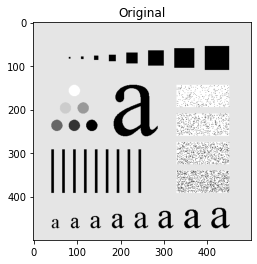

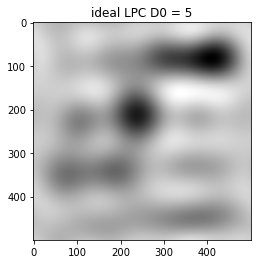

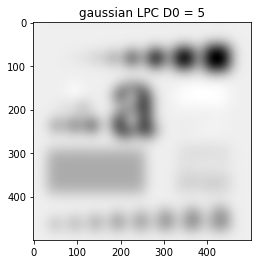

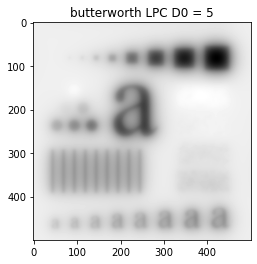

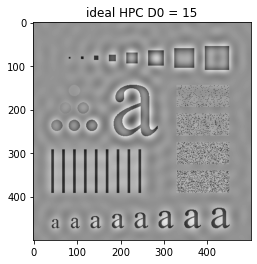

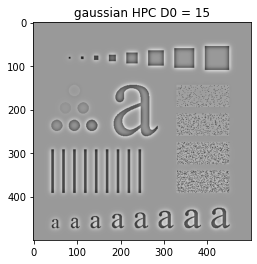

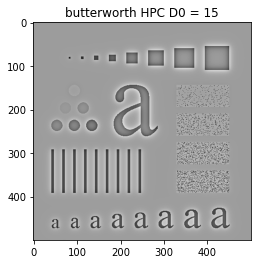

In [80]:
#test of functions

import cv2

letter = cv2.imread('.\imgs\LetterA.tif', 0)/255
F = fftshift(fft2(letter))

plt.figure()
plt.title("Original")
plt.imshow(letter, cmap = 'gray')

centr = tuple(x/2 for x in letter.shape)

H = lpcfilter(letter.shape, ftype='ideal', D0 = 5, center = centr)
G = F*H
g = np.real(ifft2(fftshift(G), letter.shape))
plt.figure()
plt.title("ideal LPC D0 = 5")
plt.imshow(g, cmap = 'gray')

H = lpcfilter(letter.shape, ftype='gaussian', D0 = 5, center = centr)
G = F*H
g = np.real(ifft2(fftshift(G), letter.shape))
plt.figure()
plt.title("gaussian LPC D0 = 5")
plt.imshow(g, cmap = 'gray')

H = lpcfilter(letter.shape, ftype='butterworth', D0 = 5, center = centr)
G = F*H
g = np.real(ifft2(fftshift(G), letter.shape))
plt.figure()
plt.title("butterworth LPC D0 = 5")
plt.imshow(g, cmap = 'gray')

H = hpcfilter(letter.shape, ftype='ideal', D0 = 15, center = centr)
G = F*H
g = np.real(ifft2(fftshift(G), letter.shape))
plt.figure()
plt.title("ideal HPC D0 = 15")
plt.imshow(g, cmap = 'gray')

H = hpcfilter(letter.shape, ftype='gaussian', D0 = 15, center = centr)
G = F*H
g = np.real(ifft2(fftshift(G), letter.shape))
plt.figure()
plt.title("gaussian HPC D0 = 15")
plt.imshow(g, cmap = 'gray')

H = hpcfilter(letter.shape, ftype='butterworth', D0 = 15, center = centr)
G = F*H
g = np.real(ifft2(fftshift(G), letter.shape))
plt.figure()
plt.title("butterworth HPC D0 = 15")
plt.imshow(g, cmap = 'gray')


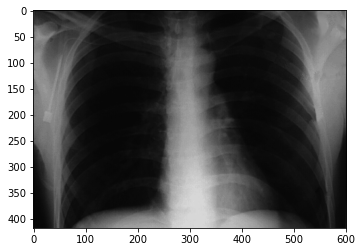

In [40]:
#dia 51: High frequency emphasis filtering and histogram equalization for image enhancement

img = cv2.imread('./imgs/ChestXray.tif')

plt.imshow(img, cmap='gray')